In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import gdown
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
url = 'https://drive.google.com/uc?id=1Rhy6shx0Fa_ZDbAhILEDjFXM3-J0RAON'
output = "household_power_consumption.txt"
gdown.download(url, output, quiet=False)
df_base = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    na_values=['?'],
    low_memory=False
)
cols_to_convert = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3'
]
for col in cols_to_convert:
    df_base[col] = pd.to_numeric(df_base[col])

Downloading...
From (original): https://drive.google.com/uc?id=1Rhy6shx0Fa_ZDbAhILEDjFXM3-J0RAON
From (redirected): https://drive.google.com/uc?id=1Rhy6shx0Fa_ZDbAhILEDjFXM3-J0RAON&confirm=t&uuid=9b320fc4-e88e-45a6-ada4-d0877f01e21e
To: /content/household_power_consumption.txt
100%|██████████| 133M/133M [00:01<00:00, 72.4MB/s]


In [67]:
# Exercicio 1
print("\n--- Exercício 1 ---")
df = df_base.copy()
print(df.head(10))
print("\n" + "="*50 + "\n")


--- Exercício 1 ---
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4         

In [68]:
# Exercicio 2
print("\n--- Exercício 2 ---")
df = df_base.copy()
print("Global active power é o consumo total da casa, Global reactive power é o consumo necessário para manter a operação de certos dispositivos, mas que não faz trabalho útil.")
print("\n" + "="*50 + "\n")


--- Exercício 2 ---
Global active power é o consumo total da casa, Global reactive power é o consumo necessário para manter a operação de certos dispositivos, mas que não faz trabalho útil.




In [69]:
# Exercicio 3
print("\n--- Exercício 3 ---")
df = df_base.copy()
nulos = df.isnull().sum()
print(nulos)
print("\n" + "="*50 + "\n")


--- Exercício 3 ---
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64




In [70]:
# Exercicio 4
print("\n--- Exercício 4 ---")
df = df_base.copy()
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Dia_da_Semana"] = df["Date"].dt.day_name()
print("Coluna 'Dia_da_Semana' criada:")
print(df[['Dia_da_Semana']].head())
print("\n" + "="*50 + "\n")


--- Exercício 4 ---
Coluna 'Dia_da_Semana' criada:
  Dia_da_Semana
0      Saturday
1      Saturday
2      Saturday
3      Saturday
4      Saturday




In [71]:
# Exercicio 5
print("\n--- Exercício 5 ---")
df = df_base.copy()
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
ano = 2007
df_ano = df[df["Date"].dt.year == ano]
global_active_power_2007 = df_ano["Global_active_power"]
media = global_active_power_2007.mean()
print(f"A média de consumo diário da coluna Global Active Power no ano de 2007 foi de: {media:.2f} kW")
print("\n" + "="*50 + "\n")


--- Exercício 5 ---
A média de consumo diário da coluna Global Active Power no ano de 2007 foi de: 1.12 kW





--- Exercício 6 ---
Gráfico


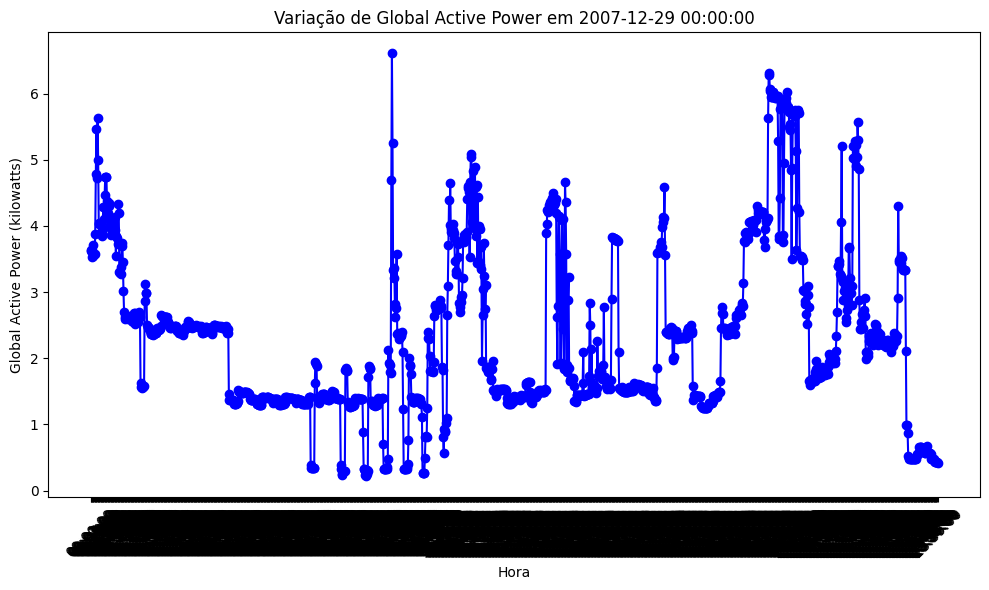

In [72]:
# Exercicio 6
print("\n--- Exercício 6 ---")
df = df_base.copy()
print("Gráfico")
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
dia = pd.to_datetime("2007-12-29")
df_dia = df[df["Date"].dt.date == dia.date()]
plt.figure(figsize=(10, 6))
plt.plot(df_dia['Time'], df_dia['Global_active_power'], marker='o', linestyle='-', color='b')
plt.title(f'Variação de Global Active Power em {dia}')
plt.xlabel('Hora')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")


--- Exercício 7 ---
Gráfico


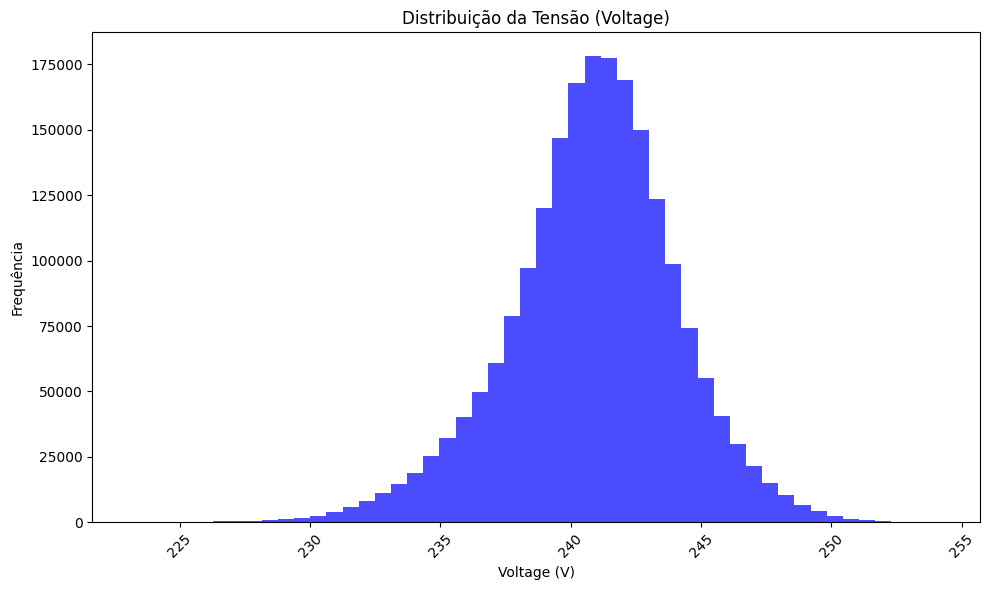

In [73]:
# Exercicio 7
print("\n--- Exercício 7 ---")
df = df_base.copy()
print("Gráfico")
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, alpha=0.7, color='blue')
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")

In [74]:
# Exercicio 8
print("\n--- Exercício 8 ---")
df = df_base.copy()
media_mes = df["Global_active_power"].mean()
print(f'O consumo médio de energia durante o período foi de {media_mes:.2f} kW')
print("\n" + "="*50 + "\n")


--- Exercício 8 ---
O consumo médio de energia durante o período foi de 1.09 kW




In [75]:
# Exercicio 9
print("\n--- Exercício 9 ---")
df = df_base.copy()
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
consumo = df.groupby("Date")["Global_active_power"].sum()
dia_max = consumo.idxmax()
consumo_max = consumo.max()
print(f'O dia com mais consumo de energia foi {dia_max.date()} com {consumo_max:.2f} kW')
print("\n" + "="*50 + "\n")


--- Exercício 9 ---
O dia com mais consumo de energia foi 2006-12-23 com 4773.39 kW




In [76]:
# Exercicio 10
print("\n--- Exercício 10 ---")
df = df_base.copy()
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Dias_da_Semana"] = df["Date"].dt.dayofweek
df["Tipo_de_Dia"] = df["Dias_da_Semana"].apply(lambda x: "Final_de_semana" if x >= 5 else "Semana")
consumo_medio_dia_da_semana = df.groupby("Tipo_de_Dia")["Global_active_power"].mean()
print(consumo_medio_dia_da_semana)
print("\n" + "="*50 + "\n")


--- Exercício 10 ---
Tipo_de_Dia
Final_de_semana    1.234232
Semana             1.035472
Name: Global_active_power, dtype: float64




In [77]:
# Exercicio 11
print("\n--- Exercício 11 ---")
df = df_base.copy()
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlacao = df[colunas].corr()
print("Matriz de correlação:")
print(correlacao)
print("\n" + "="*50 + "\n")


--- Exercício 11 ---
Matriz de correlação:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  




In [78]:
# Exercicio 12
print("\n--- Exercício 12 ---")
df = df_base.copy()
df["Total_Sub_Metering"] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
print("Coluna 'Total_Sub_Metering' criada:")
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_Metering']].head())
print("\n" + "="*50 + "\n")


--- Exercício 12 ---
Coluna 'Total_Sub_Metering' criada:
   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_Metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0




In [79]:
# Exercicio 13
print("\n--- Exercício 13 ---")
df = df_base.copy()
df["Total_Sub_Metering"] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
media_geral_gap = df['Global_active_power'].mean()
consumo_mensal = df.groupby(['Year', 'Month'])['Total_Sub_Metering'].mean()
meses_alto_consumo = consumo_mensal[consumo_mensal > media_geral_gap]
print(f"Referência (Média global de Global_active_power): {media_geral_gap:.2f} kW")
print("\nMeses onde a média de 'Total_Sub_Metering' foi MAIOR que a referência:")
for (year, month), valor in meses_alto_consumo.items():
    print(f"{year}-{month:02d}: {valor:.2f} kW")
df.drop(columns=['Year', 'Month'], inplace=True)
print("\n" + "="*50 + "\n")


--- Exercício 13 ---


/tmp/ipython-input-1187966865.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))


Referência (Média global de Global_active_power): 1.09 kW

Meses onde a média de 'Total_Sub_Metering' foi MAIOR que a referência:
2006-12: 10.87 kW
2007-01: 10.42 kW
2007-02: 9.49 kW
2007-03: 10.21 kW
2007-04: 6.84 kW
2007-05: 8.45 kW
2007-06: 7.38 kW
2007-07: 5.70 kW
2007-08: 6.98 kW
2007-09: 8.21 kW
2007-10: 8.67 kW
2007-11: 9.82 kW
2007-12: 11.64 kW
2008-01: 9.79 kW
2008-02: 8.45 kW
2008-03: 9.45 kW
2008-04: 9.57 kW
2008-05: 9.02 kW
2008-06: 9.78 kW
2008-07: 7.15 kW
2008-08: 2.37 kW
2008-09: 8.83 kW
2008-10: 8.59 kW
2008-11: 9.14 kW
2008-12: 8.79 kW
2009-01: 10.69 kW
2009-02: 9.79 kW
2009-03: 9.90 kW
2009-04: 9.61 kW
2009-05: 9.07 kW
2009-06: 8.05 kW
2009-07: 5.57 kW
2009-08: 6.04 kW
2009-09: 9.13 kW
2009-10: 9.77 kW
2009-11: 10.40 kW
2009-12: 11.09 kW
2010-01: 12.20 kW
2010-02: 12.76 kW
2010-03: 9.86 kW
2010-04: 9.51 kW
2010-05: 10.42 kW
2010-06: 9.73 kW
2010-07: 5.49 kW
2010-08: 5.34 kW
2010-09: 8.62 kW
2010-10: 9.50 kW
2010-11: 9.01 kW





--- Exercício 14 ---
Gráfico


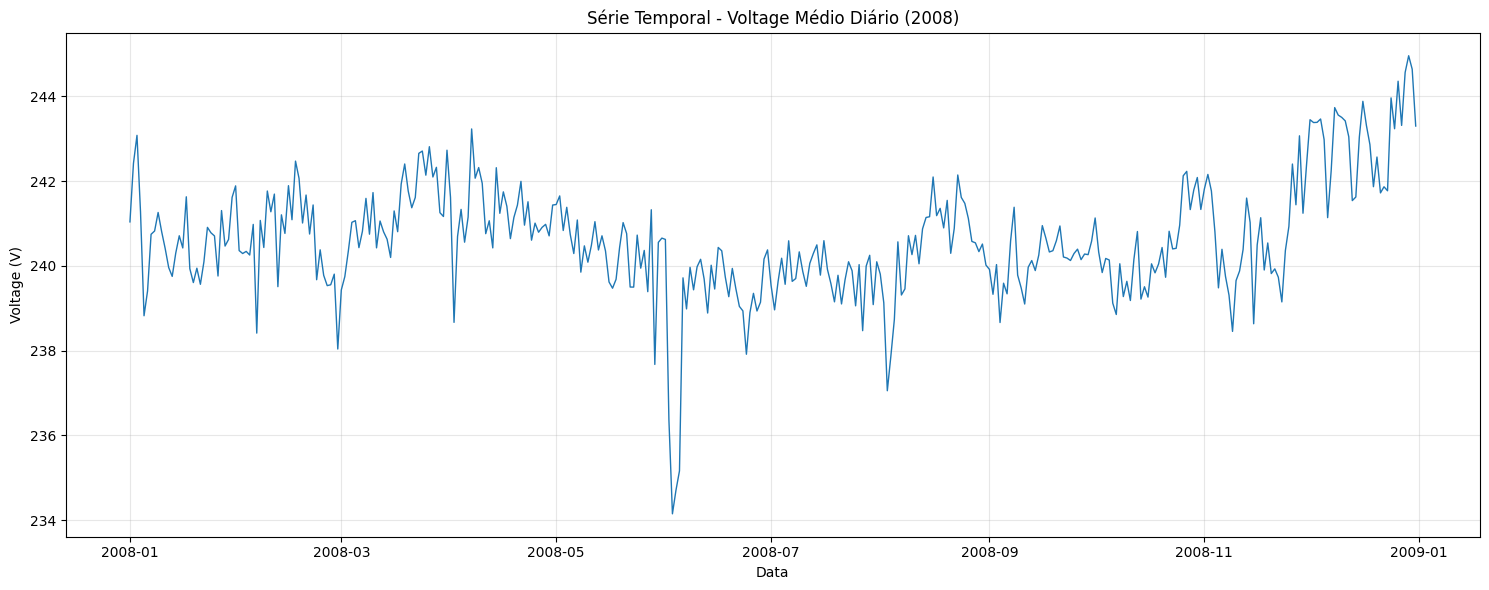

In [80]:
# Exercicio 14
print("\n--- Exercício 14 ---")
df = df_base.copy()
print("Gráfico")
df['DateTime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S")
df_2008 = df[df['DateTime'].dt.year == 2008]
df_2008_temp = df_2008.copy()
df_2008_temp.set_index('DateTime', inplace=True)
df_2008_daily = df_2008_temp['Voltage'].resample('D').mean()
plt.figure(figsize=(15, 6))
plt.plot(df_2008_daily.index, df_2008_daily.values, linewidth=1)
plt.title('Série Temporal - Voltage Médio Diário (2008)')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")

In [81]:
# Exercicio 15
print("\n--- Exercício 15 ---")
df = df_base.copy()
df['DateTime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S")
df['Month'] = df['DateTime'].dt.month
consumo_verao = df[df['Month'].isin([6, 7, 8])]['Global_active_power'].mean()
consumo_inverno = df[df['Month'].isin([12, 1, 2])]['Global_active_power'].mean()
print(f"Verão (Jun-Ago): {consumo_verao:.2f} kW")
print(f"Inverno (Dez-Fev): {consumo_inverno:.2f} kW")
diferenca = ((consumo_inverno - consumo_verao) / consumo_verao) * 100
print(f"Inverno é {diferenca:+.1f}% comparado ao verão")
df.drop(columns=['Month'], inplace=True)
print("\n" + "="*50 + "\n")


--- Exercício 15 ---
Verão (Jun-Ago): 0.73 kW
Inverno (Dez-Fev): 1.42 kW
Inverno é +95.1% comparado ao verão




In [82]:
# Exercicio 16
print("\n--- Exercício 16 ---")
df = df_base.copy()
amostra = df.sample(frac=0.01, random_state=0)
base_media = df['Global_active_power'].mean()
base_std = df['Global_active_power'].std()
amostra_media = amostra['Global_active_power'].mean()
amostra_std = amostra['Global_active_power'].std()
dif_media = abs((amostra_media - base_media) / base_media) * 100
dif_std = (amostra_std - base_std / base_std) * 100
print(f"\nComparação da coluna '{'Global_active_power'}':")
print(f"Base completa - Média: {base_media:.3f} | Desvio: {base_std:.3f}")
print(f"Amostra 1%    - Média: {amostra_media:.3f} | Desvio: {amostra_std:.3f}")
print(f"\nDiferença:")
print(f"Média: {dif_media:.2f}%")
print(f"Desvio: {dif_std:.2f}%")
print("\n" + "="*50 + "\n")


--- Exercício 16 ---

Comparação da coluna 'Global_active_power':
Base completa - Média: 1.092 | Desvio: 1.057
Amostra 1%    - Média: 1.094 | Desvio: 1.074

Diferença:
Média: 0.22%
Desvio: 7.40%




In [83]:
# Exercicio 17
print("\n--- Exercício 17 ---")
df = df_base.copy()
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
for col in colunas:
    df[f"{col}_scaled"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print("\nComparação das médias antes e depois da normalização:")
for col in colunas:
    original = df[col].mean()
    scaled = df[f"{col}_scaled"].mean()
    print(f"Média original de {col}: {original:.3f} | Média escalada: {scaled:.3f}")
print("\n" + "="*50 + "\n")


--- Exercício 17 ---

Comparação das médias antes e depois da normalização:
Média original de Global_active_power: 1.092 | Média escalada: 0.092
Média original de Global_reactive_power: 0.124 | Média escalada: 0.089
Média original de Voltage: 240.840 | Média escalada: 0.570
Média original de Global_intensity: 4.628 | Média escalada: 0.092




In [84]:
# Exercicio 18
print("\n--- Exercício 18 ---")
df = df_base.copy()
df['DateTime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S")
df_diario = df.groupby(df['DateTime'].dt.date)['Global_active_power'].mean().reset_index()
df_diario.columns = ['Date', 'Consumo_Medio']
df_diario = df_diario.dropna(subset=['Consumo_Medio'])
kmeans = KMeans(n_clusters=3, random_state=0)
df_diario['Cluster'] = kmeans.fit_predict(df_diario[['Consumo_Medio']])
print(f"Total de dias válidos: {len(df_diario)}")
for i in range(3):
    dados = df_diario[df_diario['Cluster'] == i]
    consumo_medio = dados['Consumo_Medio'].mean()
    print(f"Cluster {i}: {len(dados)} dias (consumo médio: {consumo_medio:.2f} kW)")
centroides = kmeans.cluster_centers_.flatten()
ordem = sorted(range(3), key=lambda i: centroides[i])
nomes = ['Baixo consumo', 'Consumo médio', 'Alto consumo']
for i in range(3):
    cluster_id = ordem[i]
    valor = centroides[cluster_id]
    print(f"Cluster {cluster_id}: {nomes[i]} ({valor:.2f} kW)")
print("\n" + "="*50 + "\n")


--- Exercício 18 ---
Total de dias válidos: 1433
Cluster 0: 722 dias (consumo médio: 1.19 kW)
Cluster 1: 516 dias (consumo médio: 0.68 kW)
Cluster 2: 195 dias (consumo médio: 1.82 kW)
Cluster 1: Baixo consumo (0.68 kW)
Cluster 0: Consumo médio (1.19 kW)
Cluster 2: Alto consumo (1.82 kW)





--- Exercício 19 ---


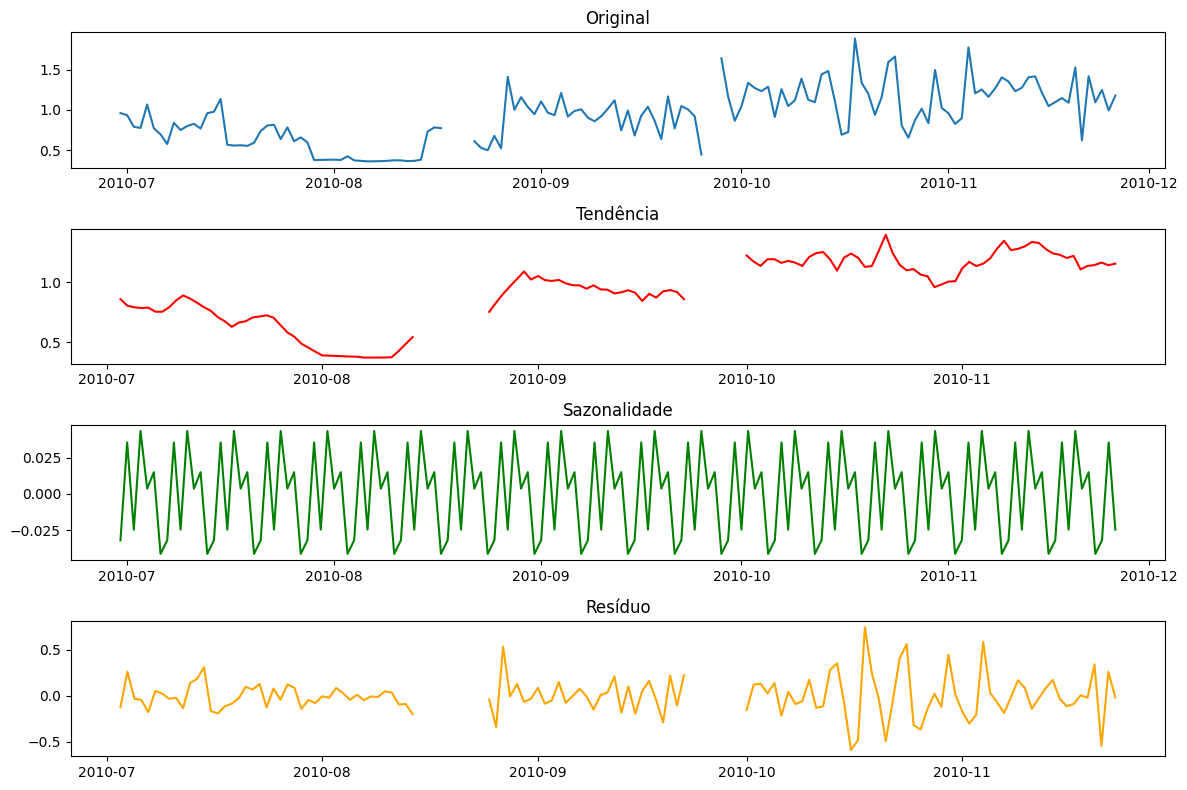

Gráfico
Tendência: +0.297 kW
Amplitude sazonal: 0.085 kW




In [85]:
# Exercicio 19
print("\n--- Exercício 19 ---")
df = df_base.copy()
df['DateTime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S")
serie = df.set_index('DateTime')['2010-06-30':'2010-12-31']['Global_active_power'].resample('D').mean()
tendencia = serie.rolling(7, center=True).mean()
sazonal = (serie - tendencia).groupby(serie.index.dayofweek).transform('mean')
residuo = serie - tendencia - sazonal
plt.figure(figsize=(12, 8))
plt.subplot(4,1,1); plt.plot(serie); plt.title('Original')
plt.subplot(4,1,2); plt.plot(tendencia, 'r'); plt.title('Tendência')
plt.subplot(4,1,3); plt.plot(sazonal, 'g'); plt.title('Sazonalidade')
plt.subplot(4,1,4); plt.plot(residuo, 'orange'); plt.title('Resíduo')
plt.tight_layout()
plt.show()
print("Gráfico")
print(f"Tendência: {tendencia.dropna().iloc[-1] - tendencia.dropna().iloc[0]:+.3f} kW")
print(f"Amplitude sazonal: {sazonal.max() - sazonal.min():.3f} kW")
print("\n" + "="*50 + "\n")

In [86]:
# Exercicio 20
print("\n--- Exercício 20 ---")
df = df_base.copy()
x = df["Global_intensity"]
y = df["Global_active_power"]
x_mean, y_mean = x.mean(), y.mean()
b1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
b0 = y_mean - b1 * x_mean
pred = b0 + b1 * x
rmse = math.sqrt(((pred - y) ** 2).mean())
r2 = 1 - ((pred - y) ** 2).sum() / ((y - y_mean) ** 2).sum()
print(f"Modelo: y = {b0:.4f} + {b1:.4f} * x")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print("\n" + "="*50 + "\n")


--- Exercício 20 ---
Modelo: y = -0.0081 + 0.2376 * x
RMSE: 0.0498
R²: 0.9978




In [87]:
# Exercicio 21
print("\n--- Exercício 21 ---")
df = df_base.copy()
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Datetime")
media_hora = df['Global_active_power'].resample('h').mean()
media_ordenada = media_hora.sort_values(ascending=False)
print("Top 5 horas de maior consumo: ")
print(media_ordenada.head(10))


--- Exercício 21 ---
Top 5 horas de maior consumo: 
Datetime
2008-11-23 18:00:00    6.560533
2009-01-16 20:00:00    6.519633
2008-02-02 19:00:00    6.496033
2007-12-23 19:00:00    6.488000
2007-02-22 21:00:00    6.363867
2007-12-28 17:00:00    6.333667
2008-11-23 20:00:00    6.310567
2007-01-21 20:00:00    6.076567
2008-01-26 19:00:00    6.013800
2008-11-30 20:00:00    5.930500
Name: Global_active_power, dtype: float64


In [88]:
# Exercicio 22
print("\n--- Exercício 22 ---")
df = df_base.copy()
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Datetime")
serie = df['Global_active_power'].resample('h').mean()
lag_1h = serie.autocorr(lag=1)
lag_24h = serie.autocorr(lag=24)
lag_48h = serie.autocorr(lag=48)
print(f"Autocorrelação (1h):  {lag_1h:.3f}")
print(f"Autocorrelação (24h): {lag_24h:.3f}")
print(f"Autocorrelação (48h): {lag_48h:.3f}")


--- Exercício 22 ---
Autocorrelação (1h):  0.713
Autocorrelação (24h): 0.436
Autocorrelação (48h): 0.401


In [89]:
# Exercicio 23
print("\n--- Exercício 23 ---")
df = df_base.copy()
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Datetime")
new_df = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
new_df = new_df.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print("Variância por cada componente:", pca.explained_variance_ratio_)
print("Variância total:", pca.explained_variance_ratio_.sum())


--- Exercício 23 ---
Variância por cada componente: [0.59103759 0.22718543]
Variância total: 0.8182230176077276



--- Exercício 24 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


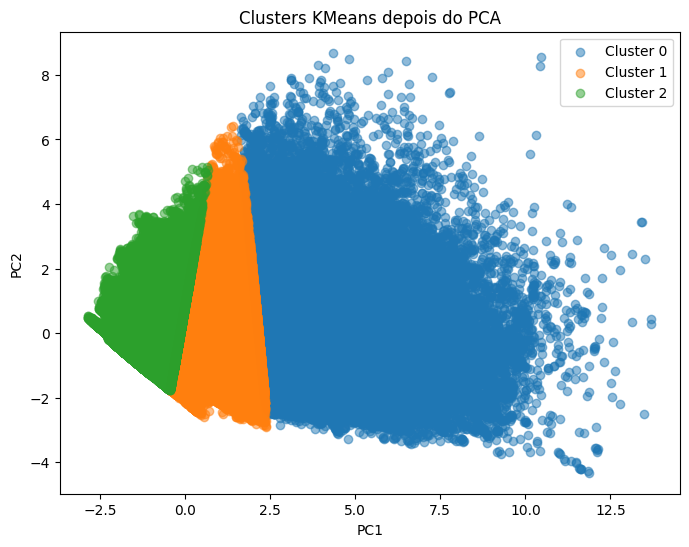

In [90]:
# Exercicio 24
print("\n--- Exercício 24 ---")
df = df_base.copy()
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Datetime")
new_df = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
new_df = new_df.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
pca = PCA(n_components=2)
new_df = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(new_df, columns=["PC1", "PC2"])
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(new_df)
df_pca["Cluster"] = clusters
plt.figure(figsize=(8,6))
for cluster_id in df_pca["Cluster"].unique():
    plt.scatter(
        df_pca[df_pca["Cluster"] == cluster_id]["PC1"],
        df_pca[df_pca["Cluster"] == cluster_id]["PC2"],
        label=f"Cluster {cluster_id}",
        alpha=0.5
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters KMeans depois do PCA")
plt.legend()
plt.show()

In [91]:
# Exercicio 25
print("\n--- Exercício 25 ---")
df = df_base.copy()
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Datetime")
df = df[['Global_active_power', 'Voltage']].dropna()
X = df[['Voltage']].values
y = df['Global_active_power'].values
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)
rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print(f"RMSE Linear: {rmse_linear:.4f}")
print(f"RMSE Polinomial (grau 2): {rmse_poly:.4f}")


--- Exercício 25 ---
RMSE Linear: 0.9691
RMSE Polinomial (grau 2): 0.9648


In [94]:
# Exercicio 26
print("\n--- Exercício 26 ---")

file_id = "1NyMOc1_JTgEC22xzQPrTCWxTBnKDBbKy"
url = f"https://drive.google.com/uc?id={file_id}"
output = "energydata_complete.csv"
gdown.download(url, output, quiet=False)
df_base2 = pd.read_csv(
    'energydata_complete.csv',
    sep=',',
    na_values=['?'],
    low_memory=False
)
print(df.info())
print(df.describe())


--- Exercício 26 ---


Downloading...
From: https://drive.google.com/uc?id=1NyMOc1_JTgEC22xzQPrTCWxTBnKDBbKy
To: /content/energydata_complete.csv
100%|██████████| 12.0M/12.0M [00:00<00:00, 34.8MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  


--- Exercício 27 ---


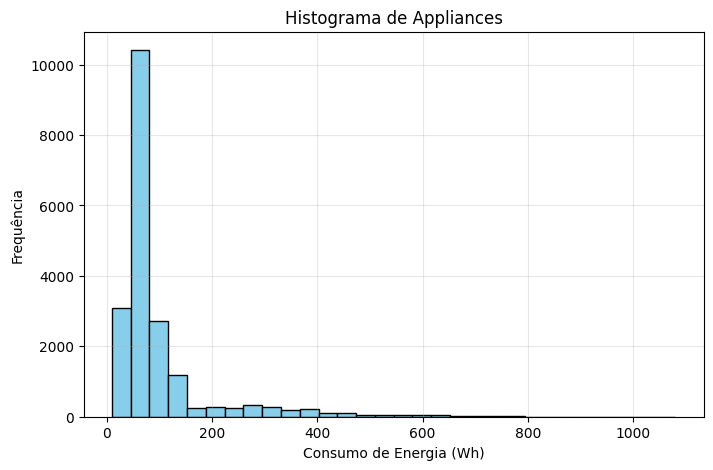

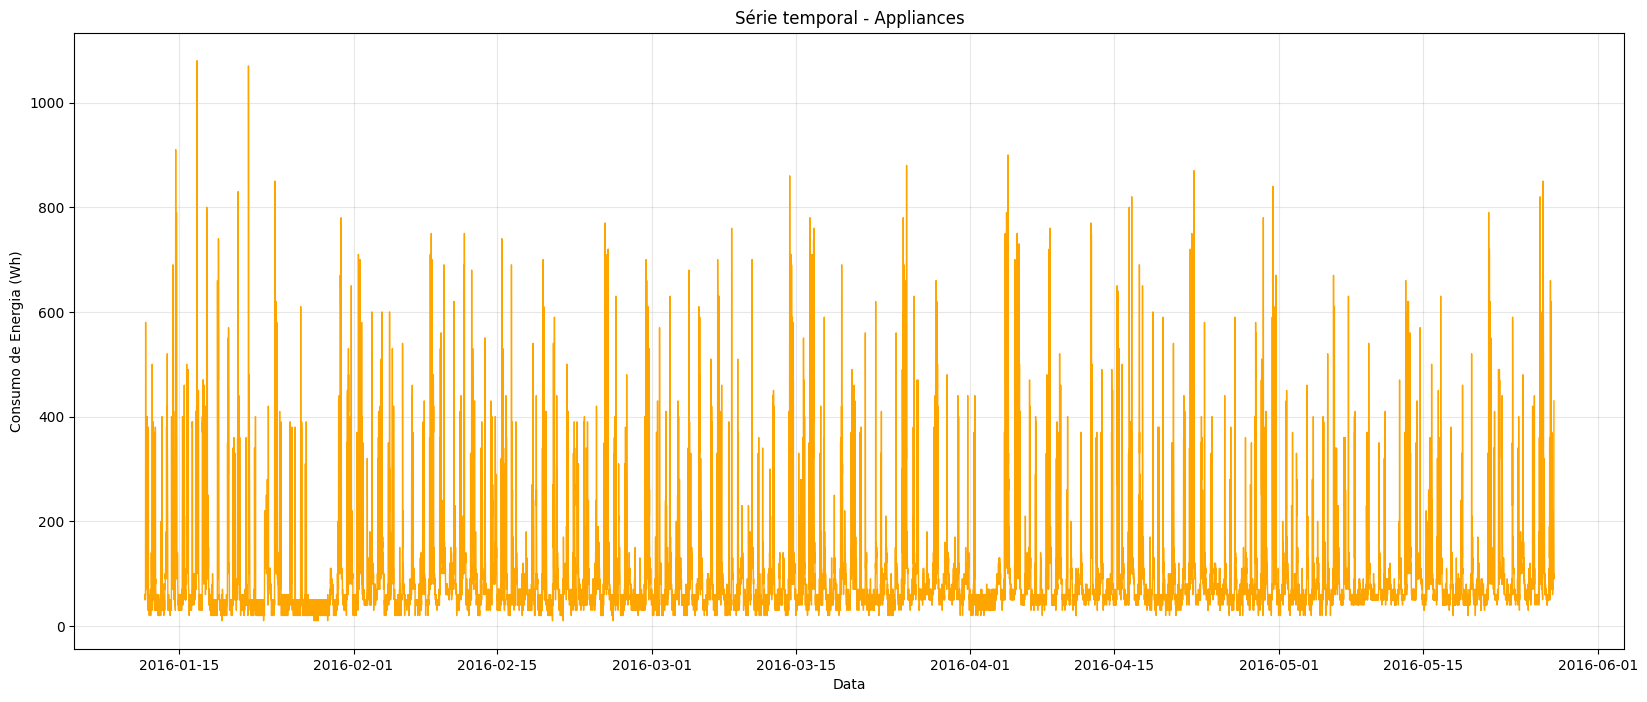

In [95]:
# Exercicio 27
print("\n--- Exercício 27 ---")
df = df_base2.copy()
plt.figure(figsize=(8, 5))
plt.hist(df["Appliances"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histograma de Appliances")
plt.xlabel("Consumo de Energia (Wh)")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.show()
df["date"] = pd.to_datetime(df["date"])
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df["Appliances"], color="orange", linewidth=1)
plt.title("Série temporal - Appliances")
plt.xlabel("Data")
plt.ylabel("Consumo de Energia (Wh)")
plt.grid(alpha=0.3)
plt.show()


In [96]:
# Exercicio 28
print("\n--- Exercício 28 ---")
df = df_base2.copy()
cols = ["Appliances", 'T1', 'T2', 'T3', 'T_out', 'RH_1', 'RH_2', 'RH_3']
df_corr = df_base2[cols].corr()
print(df_corr)


--- Exercício 28 ---
            Appliances        T1        T2        T3     T_out      RH_1  \
Appliances    1.000000  0.055447  0.120073  0.085060  0.099155  0.086031   
T1            0.055447  1.000000  0.836834  0.892402  0.682846  0.164006   
T2            0.120073  0.836834  1.000000  0.735245  0.792255  0.269839   
T3            0.085060  0.892402  0.735245  1.000000  0.699417  0.253230   
T_out         0.099155  0.682846  0.792255  0.699417  1.000000  0.340767   
RH_1          0.086031  0.164006  0.269839  0.253230  0.340767  1.000000   
RH_2         -0.060465 -0.002509 -0.165610  0.137319  0.033674  0.797535   
RH_3          0.036292 -0.028550  0.121497 -0.011234  0.118207  0.844677   

                RH_2      RH_3  
Appliances -0.060465  0.036292  
T1         -0.002509 -0.028550  
T2         -0.165610  0.121497  
T3          0.137319 -0.011234  
T_out       0.033674  0.118207  
RH_1        0.797535  0.844677  
RH_2        1.000000  0.678326  
RH_3        0.678326  1.00000

In [97]:
# Exercicio 29
print("\n--- Exercício 29 ---")
df = df_base2.copy()
df_numerico = df.select_dtypes(include=["number"])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerico)
print(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_numerico.columns, index=df_numerico.index)



--- Exercício 29 ---
[[0.04672897 0.42857143 0.32734952 ... 0.53846154 0.26544891 0.26544891]
 [0.04672897 0.42857143 0.32734952 ... 0.53393665 0.37208289 0.37208289]
 [0.03738318 0.42857143 0.32734952 ... 0.52941176 0.57284766 0.57284766]
 ...
 [0.24299065 0.14285714 0.91974657 ... 0.89894419 0.58397859 0.58397859]
 [0.38317757 0.14285714 0.91974657 ... 0.8974359  0.12637146 0.12637146]
 [0.39252336 0.14285714 0.91974657 ... 0.8959276  0.68239057 0.68239057]]



--- Exercício 30 ---


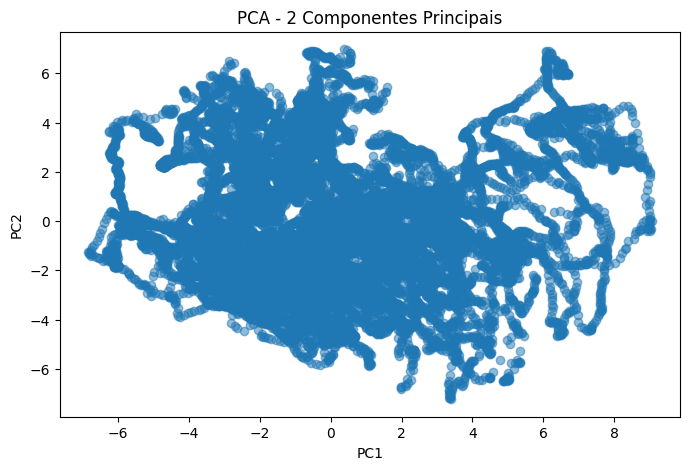

In [98]:
# Exercicio 30
print("\n--- Exercício 30 ---")
new_df = df_scaled.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2 Componentes Principais")
plt.show()

In [99]:
# Exercicio 31
print("\n--- Exercício 31 ---")
df = df_base2.copy()
X = df.drop(columns=["Appliances", "date"]).select_dtypes(include="number")
y = df["Appliances"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse_lr = math.sqrt(mse)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE (Linear): {rmse_lr:.4f}")



--- Exercício 31 ---
R²: 0.1499
MAE: 54.3867
RMSE (Linear): 98.4069


In [100]:
# Exercicio 32
print("\n--- Exercício 32 ---")
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse)
print(f"RMSE (Random Forest): {rmse_rf:.4f}")
print("Comparação: Linear vs Random Forest")
print(f"RMSE Linear: {rmse_lr:.4f} | RMSE RF: {rmse_rf:.4f}")


--- Exercício 32 ---
RMSE (Random Forest): 76.8117
Comparação: Linear vs Random Forest
RMSE Linear: 98.4069 | RMSE RF: 76.8117


In [101]:
# Exercicio 33
print("\n--- Exercício 33 ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    clusters = kmeans.fit_predict(X_scaled)
    df[f"cluster_{k}"] = clusters
    print(f"\n--- K={k} ---")
    print(df.groupby(f"cluster_{k}")["Appliances"].describe())



--- Exercício 33 ---

--- K=3 ---
            count        mean         std   min   25%   50%    75%     max
cluster_3                                                                 
0          5747.0  107.139377  104.304145  20.0  60.0  70.0  110.0   900.0
1          9353.0   92.060302   97.836300  10.0  50.0  60.0   90.0  1080.0
2          4635.0   97.354908  108.538543  10.0  40.0  60.0  100.0   910.0

--- K=4 ---
            count        mean         std   min   25%   50%    75%     max
cluster_4                                                                 
0          5624.0  105.295164  100.947415  20.0  60.0  70.0  110.0   900.0
1          7193.0   89.115807   96.494002  10.0  50.0  60.0   90.0  1080.0
2          4551.0   97.640079  109.540152  10.0  40.0  60.0  100.0   910.0
3          2367.0  105.813266  107.925982  20.0  50.0  60.0  100.0   850.0

--- K=5 ---
            count        mean         std   min   25%   50%    75%     max
cluster_5                              

In [102]:
# Exercicio 34
print("\n--- Exercício 34 ---")
median_appliances = y_train.median()
y_train_bin = (y_train > median_appliances).astype(int)
y_test_bin = (y_test > median_appliances).astype(int)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train_scaled, y_train_bin)
y_pred_log = log_reg.predict(X_test_scaled)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train_bin)
y_pred_rf_clf = rf_clf.predict(X_test)
print("Classificador treinado com sucesso")


--- Exercício 34 ---
Classificador treinado com sucesso


In [103]:
# Exercicio 35
print("\n--- Exercício 35 ---")
def avaliar_modelo(nome, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{nome}")
    print("Matriz de confusão:")
    print(cm)
    print(f"Acurácia: {acc:.4f}")
    print(f"Precisão: {prec:.4f}")
    print(f"Sensibilidade: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    tn, fp, fn, tp = cm.ravel()
    recall_baixo = tn / (tn + fp) if (tn+fp) else 0
    recall_alto = tp / (tp + fn) if (tp+fn) else 0
    if recall_alto < recall_baixo:
        print("→ O modelo erra mais para ALTO consumo")
    elif recall_baixo < recall_alto:
        print("→ O modelo erra mais para BAIXO consumo")
    else:
        print("→ O modelo erra igualmente para as duas classes")
avaliar_modelo("Regressão Logística", y_test_bin, y_pred_log)
avaliar_modelo("Random Forest Classifier", y_test_bin, y_pred_rf_clf)


--- Exercício 35 ---

Regressão Logística
Matriz de confusão:
[[1715  422]
 [ 510 1300]]
Acurácia: 0.7639
Precisão: 0.7549
Sensibilidade: 0.7182
F1-score: 0.7361
→ O modelo erra mais para ALTO consumo

Random Forest Classifier
Matriz de confusão:
[[1937  200]
 [ 219 1591]]
Acurácia: 0.8938
Precisão: 0.8883
Sensibilidade: 0.8790
F1-score: 0.8836
→ O modelo erra mais para ALTO consumo
